In [63]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm as anova

def EDA_plots(df, features = df.columns, targets = ['SalePrice']):
    # can pass features = [list of features] and targets = [list of targets]
    # to get plots and regressions of different variables
    for feature in features:
        for target in targets:
            if feature != target and feature != 'PID':
                print('feature: ',feature)
                scatter = px.scatter(x = df[f'{feature}'], y = df[f'{target}'])
                scatter.update_layout(
                    title={
                        'text': f'Scatterplot, {feature} vs {target}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = f'{target}'
                )
                scatter.show()
                hist = px.histogram(x = df[f'{feature}'])
                hist.update_layout(
                    title={
                        'text': f'Distribution of {feature}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = 'Frequency'
                )
                hist.show()
                box = px.box(x = df[f'{feature}'], y = df[f'{target}'])
                box.update_layout(
                    title={
                        'text': f'Boxplot, {feature} vs {target}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = 'Frequency'
                )
                box.show()
                temp = df[df[f'{feature}'].isna() == False].reset_index(drop = True)
                if type(temp.loc[0, f'{feature}']) != str:
                    price_corr = temp[f'{feature}'].corr(temp[f'{target}'])
                    print(f'Correlation between {feature} and {target} is {price_corr}')
                    linreg = stats.linregress(temp[f'{feature}'], temp[f'{target}'] )
                    print(linreg)
                    print('r^2 = ',linreg.rvalue**2)
                if type(temp.loc[0, f'{feature}']) == str:
                    # this is to see full multiple regression on each value of categorical variable
                    # can comment this out
                    fit = ols(f'{target} ~ C({feature})', data=temp).fit()
                    print(fit.summary())
                    # this is to see anova on whether any value of categorical variable is significantly different
                    #anova_table = anova(fit, typ=2)
                    #print(anova_table)
            print()

In [2]:
df = pd.read_csv('./../person1data.csv', index_col = 0)

In [3]:
df = df.reset_index(drop = True)

In [59]:
df[df['LotFrontage'] > 150]

,PID,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,LandContour,MSZoning,Street,Alley,Neighborhood,LotConfig,Condition1,Condition2,Foundation,Utilities,Heating,HeatingQC,CentralAir,Electrical
74,527108090,274725,168.0,23257,IR3,Gtl,HLS,RL,Pave,NaN,Gilbert,CulDSac,Norm,Norm,PConc,AllPub,GasA,Ex,Y,SBrkr
527,527226040,155000,195.0,41600,IR1,Gtl,Lvl,RL,Pave,NaN,Gilbert,FR2,Norm,Norm,CBlock,AllPub,GasW,TA,Y,SBrkr
536,923251180,131000,160.0,20000,Reg,Gtl,Lvl,RL,Pave,NaN,Mitchel,Inside,Norm,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr
582,527175130,154204,160.0,18160,Reg,Gtl,Lvl,RL,Grvl,NaN,Gilbert,Inside,Norm,Norm,CBlock,AllPub,GasA,Fa,Y,SBrkr
981,535427070,242000,313.0,27650,IR2,Mod,HLS,RL,Pave,NaN,NAmes,Inside,PosA,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr
1146,528321010,403000,174.0,15138,IR1,Gtl,Lvl,RL,Pave,NaN,NoRidge,Inside,Norm,Norm,PConc,AllPub,GasA,Ex,Y,SBrkr
1626,906475170,279000,155.0,20064,IR1,Sev,Low,RL,Pave,NaN,ClearCr,Inside,Norm,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr
1703,527225035,164000,152.0,12134,IR1,Mod,Bnk,RL,Pave,NaN,Gilbert,Inside,Norm,Norm,Wood,AllPub,GasA,Gd,Y,SBrkr
1720,903430130,52500,153.0,4118,IR1,Mod,Bnk,RM,Pave,Grvl,OldTown,Corner,Feedr,Norm,CBlock,AllPub,Grav,Fa,N,FuseA
2008,923202220,130000,200.0,43500,Reg,Gtl,Lvl,RL,Pave,NaN,Mitchel,Inside,Artery,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr


In [60]:
df[df['LotArea'] > 50000]

,PID,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,LandContour,MSZoning,Street,Alley,Neighborhood,LotConfig,Condition1,Condition2,Foundation,Utilities,Heating,HeatingQC,CentralAir,Electrical
104,906426195,240000,NaN,53107,IR2,Mod,Low,RL,Pave,NaN,ClearCr,Corner,Feedr,Norm,PConc,AllPub,GasA,Ex,Y,SBrkr
195,905401060,256000,NaN,53227,IR1,Mod,Low,RL,Pave,NaN,ClearCr,CulDSac,Norm,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr
249,906426060,277000,NaN,159000,IR2,Sev,Low,RL,Pave,NaN,ClearCr,CulDSac,Norm,Norm,CBlock,AllPub,GasA,Gd,Y,SBrkr
347,533350050,385000,68.0,50271,IR1,Gtl,Low,RL,Pave,NaN,Veenker,Inside,Norm,Norm,CBlock,AllPub,GasA,Gd,Y,SBrkr
355,916176125,375000,150.0,215245,IR3,Sev,Low,RL,Pave,NaN,Timber,Inside,Norm,Norm,CBlock,AllPub,GasW,TA,Y,SBrkr
568,1007100110,103000,NaN,56600,IR1,Gtl,Low,I (all),Pave,NaN,IDOTRR,Inside,Norm,Norm,BrkTil,AllPub,GasA,Ex,Y,SBrkr
615,527216080,591587,52.0,51974,IR1,Gtl,Lvl,RL,Pave,NaN,StoneBr,CulDSac,PosN,Norm,PConc,AllPub,GasA,Ex,Y,SBrkr
802,527216070,538000,47.0,53504,IR2,Mod,HLS,RL,Pave,NaN,StoneBr,CulDSac,Norm,Norm,PConc,AllPub,GasA,Ex,Y,SBrkr
1271,905301050,302000,NaN,115149,IR2,Sev,Low,RL,Pave,NaN,ClearCr,CulDSac,Norm,Norm,CBlock,AllPub,GasA,TA,Y,SBrkr
1634,916125425,228950,NaN,164660,IR1,Sev,HLS,RL,Grvl,NaN,Timber,Corner,Norm,Norm,CBlock,AllPub,GasA,Ex,Y,SBrkr


In [62]:
df[df['LotFrontage'] <= 0]

,PID,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,LandContour,MSZoning,Street,Alley,Neighborhood,LotConfig,Condition1,Condition2,Foundation,Utilities,Heating,HeatingQC,CentralAir,Electrical


In [64]:
EDA_plots(df, features = df.columns[0:5])



feature:  LotFrontage


Correlation between LotFrontage and SalePrice is 0.3585770737824612
LinregressResult(slope=1227.197164525392, intercept=92542.34894974912, rvalue=0.35857707378246123, pvalue=2.787391670842792e-65, stderr=69.45257831119562, intercept_stderr=5015.841197341647)
r^2 =  0.12857751784239266

feature:  LotArea


Correlation between LotArea and SalePrice is 0.2744434573344542
LinregressResult(slope=2.533770018681036, intercept=152417.48176252644, rvalue=0.2744434573344542, pvalue=8.30301952439037e-46, stderr=0.17485126235142173, intercept_stderr=2269.2907005287334)
r^2 =  0.07531921127368837

feature:  LotShape


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     89.25
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           6.05e-55
Time:                        17:41:09   Log-Likelihood:                -32495.
No. Observations:                2580   AIC:                         6.500e+04
Df Residuals:                    2576   BIC:                         6.502e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.066e+05   2443

In [54]:
EDA_plots(df, features = df.columns[5:10])

feature:  LandSlope


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.200
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           0.000282
Time:                        17:20:16   Log-Likelihood:                -32614.
No. Observations:                2580   AIC:                         6.523e+04
Df Residuals:                    2577   BIC:                         6.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.767e+05   1

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     28.71
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.97e-18
Time:                        17:20:16   Log-Likelihood:                -32580.
No. Observations:                2580   AIC:                         6.517e+04
Df Residuals:                    2576   BIC:                         6.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.503e+

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     56.28
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.44e-65
Time:                        17:20:16   Log-Likelihood:                -32463.
No. Observations:                2580   AIC:                         6.494e+04
Df Residuals:                    2573   BIC:                         6.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                8.1

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.579
Date:                Tue, 17 Aug 2021   Prob (F-statistic):             0.0104
Time:                        17:20:17   Log-Likelihood:                -32619.
No. Observations:                2580   AIC:                         6.524e+04
Df Residuals:                    2578   BIC:                         6.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.174e+05   2.37e+0

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     67.31
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           6.11e-14
Time:                        17:20:17   Log-Likelihood:                -2017.3
No. Observations:                 168   AIC:                             4039.
Df Residuals:                     166   BIC:                             4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.263e+05   3897.324  

In [55]:
EDA_plots(df, features = df.columns[10:15])

feature:  Neighborhood


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:27:18   Log-Likelihood:                -31564.
No. Observations:                2580   AIC:                         6.318e+04
Df Residuals:                    2552   BIC:                         6.335e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.88
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           3.32e-11
Time:                        17:27:18   Log-Likelihood:                -32595.
No. Observations:                2580   AIC:                         6.520e+04
Df Residuals:                    2575   BIC:                         6.523e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     15.25
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           4.48e-22
Time:                        17:27:19   Log-Likelihood:                -32563.
No. Observations:                2580   AIC:                         6.514e+04
Df Residuals:                    2571   BIC:                         6.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.29

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.313
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.95e-11
Time:                        17:27:19   Log-Likelihood:                -32590.
No. Observations:                2580   AIC:                         6.520e+04
Df Residuals:                    2572   BIC:                         6.524e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.30

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          9.30e-171
Time:                        17:27:19   Log-Likelihood:                -32222.
No. Observations:                2580   AIC:                         6.446e+04
Df Residuals:                    2574   BIC:                         6.449e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [56]:
EDA_plots(df, features = df.columns[15:20])

feature:  Utilities


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.995
Date:                Tue, 17 Aug 2021   Prob (F-statistic):             0.0836
Time:                        17:28:37   Log-Likelihood:                -32621.
No. Observations:                2580   AIC:                         6.525e+04
Df Residuals:                    2578   BIC:                         6.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.78

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.118
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           0.000999
Time:                        17:28:37   Log-Likelihood:                -32612.
No. Observations:                2580   AIC:                         6.524e+04
Df Residuals:                    2574   BIC:                         6.527e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            7.25e+04   7.48

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          9.94e-125
Time:                        17:28:37   Log-Likelihood:                -32331.
No. Observations:                2580   AIC:                         6.467e+04
Df Residuals:                    2575   BIC:                         6.470e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.111e+05   1865

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     183.4
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.01e-40
Time:                        17:28:37   Log-Likelihood:                -32534.
No. Observations:                2580   AIC:                         6.507e+04
Df Residuals:                    2578   BIC:                         6.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.036e+05   5679

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     51.51
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.51e-32
Time:                        17:28:37   Log-Likelihood:                -32535.
No. Observations:                2579   AIC:                         6.508e+04
Df Residuals:                    2575   BIC:                         6.510e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.23

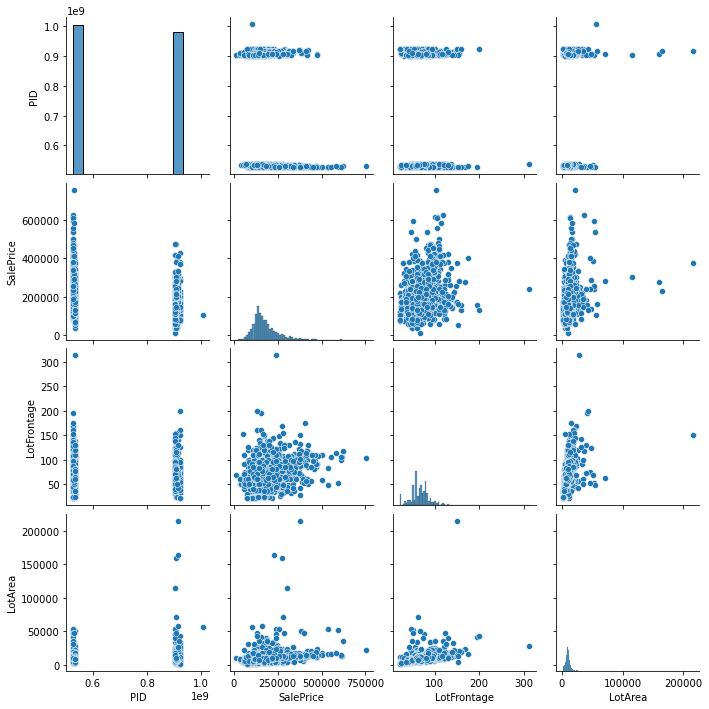

In [57]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df)
plt.show()